# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [7]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)

### 1. Is the distribution of body temperatures normal?

According to the 4 tests below, the distribution of body temperatures is normal.

Text(0, 0.5, 'Frequency')

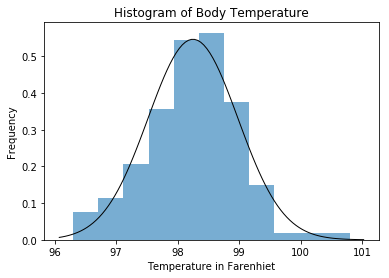

In [10]:
## Graphical Approach
# Plot the histogram.
plt.hist(df.temperature, density=True, alpha=0.6, bins= int(np.sqrt(len(df.temperature))))

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=1)
plt.title("Histogram of Body Temperature")
plt.xlabel('Temperature in Farenhiet')
plt.ylabel('Frequency')

In [87]:
n_stat, n_pval = stats.normaltest(df.temperature)
is_normal = 'not normal' if (n_pval < 0.05) else 'normal'

print('The data distribution is',is_normal,'distribution.')

The data distribution is normal distribution.


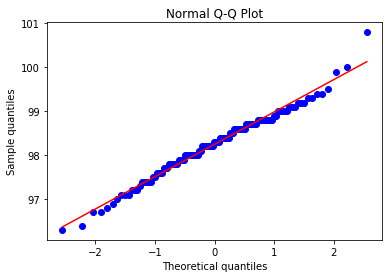

In [13]:
## QQ plot
import pylab 

stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

In [33]:
## ECDF Approach
def ecdf(data):
    """compute ecdf"""
    return np.sort(data), np.arange(1, len(data)+1)/len(data)

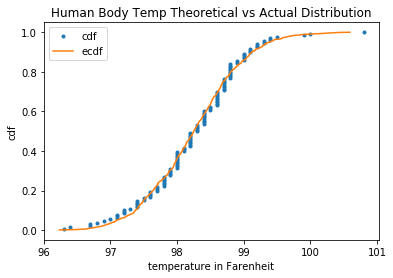

In [32]:
x_temp, y_temp = ecdf(df.temperature)
theoretical = np.random.normal(mean, std, size=1000)
x_theo_temp, y_theo_temp = ecdf(theoretical)

plt.plot(x_temp,y_temp,marker='.',linestyle='none')
plt.plot(x_theo_temp,y_theo_temp)
plt.title('Human Body Temp Theoretical vs Actual Distribution')
plt.ylabel('cdf')
plt.xlabel('temperature in Farenheit')
plt.legend(('cdf','ecdf'))
plt.show()

In [34]:
# Normal Test Function
n_stat, n_pval = stats.normaltest(df.temperature)
is_normal = 'not normal' if (n_pval < 0.05) else 'normal'

print('The data distribution is',is_normal,'distribution.')

The data distribution is normal distribution.


### 2. Is the sample size large? Are the observations independent?

In [35]:
size = len(df)
print(size)

130


The dataset contains data for 130 individuals. Since this is greater than 30, it is large enough for the Central Limit Theoren to hold true. It is less than 10% of population, so the observations are independent.

### 3. Is the true population mean really 98.6 degrees F?

**Bootstrap Hypothesis Testing**<br>
* $H_0$: True population mean is 98.6<br>
* $H_A$: True population mean is not 98.6

In [36]:
# Calculates p value using 100,000 boostrap replicates
bootstrap_replicates = np.empty(100000)

for i in range(100000):
    bootstrap_sample = np.random.choice(df.temperature, size)
    bootstrap_replicates[i] = np.mean(bootstrap_sample)

p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print(f'p = {p}')

p = 0.0


Since the p-value is extremely small (0), we reject the null hypothesis. Therefore, there's significant evidence that the true population mean is not 98.6.

**Frequentist Statistical Testing with One Sample Test** <br>

*One-sample test will be used because we are not comparing 2 different groups*

In [40]:
print(f"Sample mean: {mean}", f"\nSample standard deviation: {std}")

# Need to calculate standard error because do not have population std
s = std/np.sqrt(len(df))
print(f"Standard error of mean: {s}")

Sample mean: 98.24923076923078 
Sample standard deviation: 0.7303577789050377
Standard error of mean: 0.06405661469519336


Calculate 95% Confidence Interval

In [80]:
lower_bd = mean - 1.96*s
upper_bd = mean + 1.96*s
print(f"Confidence Interval of 95%: [{lower_bd}, {upper_bd}]")

Confidence Interval of 95%: [98.12367980442819, 98.37478173403336]


Since 98.6 does not lie within the confidence interval, the true population mean is not 98.6

**Z-Test (Critical Value: 0.01)**

Since the sample size is larger than 30, it is appropriate to use z-statistic

In [54]:
z_stat = (mean - 98.6)/s
z_pval = stats.norm.sf(abs(z_stat))*2 #twosided
print(f"z statistic: {z_stat}", f"\np-value: {z_pval}")

z statistic: -5.475925202078116 
p-value: 4.3523151658821886e-08


Since the p-value is extremely smaller than 0.01, we can reject the null hypothesis.

Below is what the p-value would have been if we had used t-test.

In [55]:
t_stat, t_pval = stats.ttest_1samp(df.temperature, 98.6, axis=0)
print(f"t statistic: {t_stat}", f"\np-value: {t_pval}")

t statistic: -5.4548232923645195 
p-value: 2.4106320415561276e-07


The p-value of t-test is larger than z-test, meaning t-test distribution is fatter than z-test distribution. However, it is still less than 0.01, and we can still reject the null hypothesis. The true mean is not 98.6

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [74]:
np.random.seed(40)
temp_10 = np.random.choice(df.temperature, size = 10)

In [75]:
# Calculate necessary statistics
mean_10 = np.mean(temp_10)
std_10 = np.std(temp_10)
se_10 = std_10/np.sqrt(10)
print(f'mean: {mean_10}', f'\nstandard deviation: {std_10}', f'\nstandard error: {se_10}') 

mean: 98.77000000000001 
standard deviation: 0.630951662173895 
standard error: 0.19952443459386143


**95% Confidence Interval**

In [76]:
lower_bd_10 = mean_10 - 1.96*se_10
upper_bd_10 = mean_10 + 1.96*se_10
print(f"Confidence Interval of 95%: [{lower_bd_10}, {upper_bd_10}]")

Confidence Interval of 95%: [98.37893210819604, 99.16106789180398]


**T-Test (Critical Value: 0.01)** <br>

*Use t-statistic because sample size < 30*

In [77]:
t_stat_10, t_pval_10 = stats.ttest_1samp(temp_10, 98.6, axis = 0)
print(f"t statistic: {t_stat_10}", f"\np-value: {t_pval_10}")

t statistic: 0.8083028076079273 
p-value: 0.43975836616787


With a smaller sample size, we are unable to reject the null hypothesis. 98.6 lies within the 95% confidence interval and the p-value for the t-test is greater than 0.01

**Z-Test (Critical Value: 0.01)**

In [78]:
z_stat_10 = (mean_10 - 98.6)/se_10
z_pval_10 = stats.norm.sf(abs(z_stat_10))*2 #twosided
print(f"z statistic: {z_stat}", f"\np-value: {z_pval}")

z statistic: -3.260780417008125 
p-value: 0.001111060453904971


The p-value when using z-test is significantly smaller than t-test. Ideally, t-test should be used whenever the sample is less than 30.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

**Bootstrap Hypothesis Testing**

In [85]:
bootstrap_replicates = np.empty(10000)
for i in range(10000):
    bootstrap_replicates[i] = np.mean(np.random.choice(df.temperature,size))
bootstrap_ci = np.percentile(bootstrap_replicates,[2.5,97,5])
print('bootstrap mean temperature:',bootstrap_replicates.mean())
print(f'95% confidence interval: [{round(bootstrap_ci[0],4)}, {bootstrap_ci[1]}]')

bootstrap mean temperature: 98.24930553846154
95% confidence interval: [98.1231, 98.37]


**Frequentist approach**

In [88]:
bs_mean = np.mean(bootstrap_replicates)
bs_std = np.std(bootstrap_replicates)
bs_se = bs_std/np.sqrt(size)

bs_lower = bs_mean - 1.96*bs_se
bs_upper = bs_mean + 1.96*bs_se
print(f'bootstrap mean temperature: {bs_mean}')
print(f'95% confidence interval: [{bs_lower}, {bs_upper}]')

bootstrap mean temperature: 98.24930553846154
95% confidence interval: [98.23825927796642, 98.26035179895666]


**Predictive intervals using normal interval function**

In [89]:
predictive_ci = stats.norm.interval(0.95, loc=mean, scale=std)
predictive_ci

(96.81775582674824, 99.68070571171332)

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [97]:
# Use std instead of se because this is the normal temperature for an individual
moe = 1.96 * std
lower_bd = mean - moe
upper_bd = mean + moe
print(f'95% confidence interval: [{lower_bd}, {upper_bd}]')

95% confidence interval: [96.8177295225769, 99.68073201588466]


Temperature is considered abnormal if it lies above and below of the 95% confidence interval [96.82, 99.68].

### 6. Is there a significant difference between males and females in normal temperature?

In [106]:
# Subsetting the df
male = df[df.gender == 'M'].temperature
female = df[df.gender == 'F'].temperature

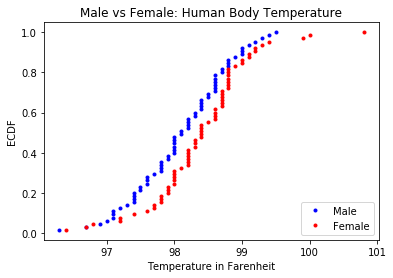

The difference between the male and female mean temperatures is 0.289230769230727


In [108]:
# Plotting ECDF
x_male, y_male = ecdf(male)
x_female, y_female = ecdf(female)
plt.plot(x_male, y_male, marker='.', linestyle='none', color='blue')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='red')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('ECDF')
plt.legend(('Male', 'Female'), loc='lower right')
plt.title('Male vs Female: Human Body Temperature')
plt.show()

diff = np.abs(np.mean(male) - np.mean(female))
print(f'The difference between the male and female mean temperatures is {diff}')

According to the graph, there appears to be a difference in the 2 distributions. Therefore, we should do a formal hypothesis test

**Distribution Hypothesis Testing (Critical Value 0.05)**

$H_0$: There's no difference between males and females. <br>
$H_A$: There's a difference.

In [117]:
# Bootstrap Permutation
bootstrap_replicates = np.empty(10000)
for i in range(10000):
    perm = np.random.permutation(np.concatenate((male, female)))
    perm_male = perm[:len(male)]
    perm_fem = perm[len(male):]
    bootstrap_replicates[i] = np.abs(np.mean(perm_male) - np.mean(perm_fem))
    
perm_pval = np.sum(bootstrap_replicates >= diff)/10000
print(f'p-value: {perm_pval}')

p-value: 0.0228


In [119]:
# Two Sample Z test
se_diff = np.sqrt((np.std(female)/np.sqrt(len(female)))**2 + (np.std(male)/np.sqrt(len(male)))**2)
z_stat = (diff - 0)/se_diff
z_pval = stats.norm.sf(abs(z_stat))*2 #twosided
print(f"z statistic: {z_stat}", f"\np-value: {z_pval}")

z statistic: 2.3032202891940123 
p-value: 0.02126645183012935


The p-value for both the bootstrap approach and the z-test are less than 0.05; therefore, the null hypothesis is rejected. There is a difference between males and females.

## Conclusion

The idea that the average normal body temperature is 98.6$^{\circ}$F is no longer statistically significant. The 95% confidence interval for average normal body temperature is [98.12, 98.37]. However, at the individual level, body temperature is considered abnormal if it lies below 96.82 or above 99.68. 